<img src="https://www.rp.edu.sg/images/default-source/default-album/rp-logo.png" width="200" alt="Republic Polytechnic"/>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atlanca8/C379-2025-Sem1/blob/main/L13/L13.ipynb)
# C379 Emerging Technologies

# Lesson 8 - Scientific Computing Library for Python 

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/C379'

### Using NumPy 
NumPy is the foundational library for the scientific computing library for the Python ecosystem. The main libraries in the ecosystem - pandas, matplotlib, SciPy and scikit-learn are based on NumPy. Please refer to http://numpy.org for more information. 

As it is a foundational library, it is important to know at least the basics of NumPy. 

### NumPy Tutorial
Here are a couple of motivating examples about why vectorization is needed when doing any kind of scientific computing. Let's perform a couple of simple calculations with Python. 

First, let's say you have some distances and times and you would like to calculate the speeds: 

In [1]:
distances = [10, 15, 17, 26] 
times = [0.3, 0.47, 0.55, 1.20]

# Calculate speeds with Python
speeds = []
for i in range (len(distances)):
    speeds.append(distances[i]/times[i])
    
speeds

[33.333333333333336,
 31.914893617021278,
 30.909090909090907,
 21.666666666666668]

An alternative to accomplish the same in Python methodlogy would be the following: 

In [2]:
# An alternative
speeds = [d/t for d,t in zip(distances, times)]
speeds

[33.333333333333336,
 31.914893617021278,
 30.909090909090907,
 21.666666666666668]

For the second motivating example, let's say you have a list of product qualities and their respective prices, and you would like to calculate the total of the purchase. The code in Python would look something like this: 

In [3]:
product_quantities = [13, 5, 6, 10, 11]
prices = [1.2, 6.5, 1.0, 4.8, 5.0]
total = sum([q*p for q,p in zip(product_quantities, prices)])
total

157.1

The point of these two examples is that, for this type of calculation, you need to perform operations element by element and in Python (as well as most programming languages) you do it by using for loops or list comprehensions (which are just convenient ways of writing for loops). 

Vectorization is a style of computer programming where operations are applied to arrays of individual elements. In other words, a vectorized operation is the application of the operation, element by element, without explicitly doing it with for loops. 

Now, let's take a look at the NumPy approach to doing the former operations: 

First, let's import the NumPy library and do the speeds calculation. As you can see, by adding the mathematical definition of speed, this is very easy and natural.

In [4]:
import numpy as np 

# Calculate the speeds
distances = np.array([10, 15, 17, 26]) 
times = np.array([0.3, 0.47, 0.55, 1.20])
speeds = distances/times
speeds

array([33.33333333, 31.91489362, 30.90909091, 21.66666667])

Again for the purchase calculation, the code for running this calculation is much easier and more natural: 

In [5]:
# Calaculate the total of a purchase
product_quantities = np.array([13, 5, 6, 10, 11])
prices = np.array([1.2, 6.5, 1.0, 4.8, 5.0])
total = (product_quantities*prices).sum()
total

157.1

After running this calculation, you will get the same total: 157.1

Now, let learn some of the basics of array creation, main attributes, and operations. This is of course by no means a complete introduction, but it will be enough for you to have a basic understanding of how NumPy arrays work. 

As you saw earlier, we can create arrays from lists like: 

In [6]:
# Array from lists
product_quantities = [13, 5, 6, 10, 11]
prices = [1.2, 6.5, 1.0, 4.8, 5.0]
product_quantities = np.array(product_quantities)
prices = np.array(prices)

If you pass a list of lists to np.array(), it will create a two-dimensional array. If passed a list of lists (three nested lists), it will create a three-dimentional array, and so on and so forth:

In [7]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

Take a look at some of the array's main attributes. Let's create some arrays containing randomly generated numbers: 

In [8]:
# Set a seed for reproducibility 
np.random.seed(0) 

# 1D array
x1 = np.random.randint(low=0, high=9, size=12)

# 2D array
x2 = np.random.randint(low=0, high=9, size=(3, 4))

# 3D array
x3 = np.random.randint(low=0, high=9, size=(3, 4, 5))

print (x1, '\n')
print (x2, '\n')
print (x3, '\n')

[5 0 3 3 7 3 5 2 4 7 6 8] 

[[8 1 6 7]
 [7 8 1 5]
 [8 4 3 0]] 

[[[3 5 0 2 3]
  [8 1 3 3 3]
  [7 0 1 0 4]
  [7 3 2 7 2]]

 [[0 0 4 5 5]
  [6 8 4 1 4]
  [8 1 1 7 3]
  [6 7 2 0 3]]

 [[5 4 4 6 4]
  [4 3 4 4 8]
  [4 3 7 5 5]
  [0 1 5 3 0]]] 



Some important array attributes are as follows: 

- ndarray.ndim: The number of dimensions (axes) of the array.
- ndarray.shape: The dimensions of the array. This tuple of integers indicates the size of the array in each dimension.
- ndarray.size: The total number of elements of the array. This is equal to the product of the elements of shape.
- ndarray.dtype: An object describing the type of the elements in the array. One can create or specify dtype's using standard Python types. Moreover, NumPy provides types of its own. numpy.int32, numpy.int16 and numpy.float64 are some examples: 

In [9]:
print ("x3 ndim: ", x3.ndim)
print ("x3 shape: ", x3.shape)
print ("x3 size: ", x3.size)
print ("x3 dtype: ", x3.dtype)

x3 ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60
x3 dtype:  int32


One-dimensional arrays can be indexed, sliced and iterated over, just like lists or other Python sequences: 

In [10]:
print (x1)
print (x1[5])   # Element at index 5
print (x1[2:5]) # Slice from elements in indexes 2, 3 & 4
print (x1[-1])  # Last element of the array

[5 0 3 3 7 3 5 2 4 7 6 8]
3
[3 3 7]
8


Multi-dimensional arrays have one index per axis. These indices are given in a tuple separated by commas: 

In [11]:
# Integers from 1 to 20 
one_to_twenty = np.arange(1, 21)

# Tranform to 5-row by 4-column matrix 
my_matrix = one_to_twenty.reshape(5, 4) 

my_matrix

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [12]:
# Display element in row 3, column 4 (remember Python is zero indexed) 
my_matrix[2, 3]

12

In [13]:
# Display row in the 2nd column of my_matrix 
my_matrix[:, 1]

array([ 2,  6, 10, 14, 18])

In [14]:
# Display 1st & 2nd row of the last column
my_matrix[0:2, -1]

array([4, 8])

In [15]:
# Set the 1st element to -1
my_matrix[0, 0] = -1
my_matrix

array([[-1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

Finally, let's perform some mathematical operations on the former matrix, just to have some examples of how vectorization works:

In [16]:
 # Integers from 1 to 20 
one_to_twenty = np.arange(1, 21)

# Tranform to 5-row by 4-column matrix 
my_matrix = one_to_twenty.reshape(5, 4) 

# The following operations are done to every element of the matrix

# Addition
my_matrix + 5

array([[ 6,  7,  8,  9],
       [10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21],
       [22, 23, 24, 25]])

In [17]:
# Write your Python Code to display the result of the 2D matrix substract by 15
# ...




In [6]:
# Write your Python Code to display the result of the 2D matrix multiply by 8
# ...




array([[  8,  16,  24,  32],
       [ 40,  48,  56,  64],
       [ 72,  80,  88,  96],
       [104, 112, 120, 128],
       [136, 144, 152, 160]])

In [18]:
# Division by 2
my_matrix / 2

array([[ 0.5,  1. ,  1.5,  2. ],
       [ 2.5,  3. ,  3.5,  4. ],
       [ 4.5,  5. ,  5.5,  6. ],
       [ 6.5,  7. ,  7.5,  8. ],
       [ 8.5,  9. ,  9.5, 10. ]])

In [19]:
# Exponentiation (e.g. X^2)
my_matrix ** 2

array([[  1,   4,   9,  16],
       [ 25,  36,  49,  64],
       [ 81, 100, 121, 144],
       [169, 196, 225, 256],
       [289, 324, 361, 400]], dtype=int32)

In [20]:
# Powers of 2 (e.g. 2^X)
2 ** my_matrix

array([[      2,       4,       8,      16],
       [     32,      64,     128,     256],
       [    512,    1024,    2048,    4096],
       [   8192,   16384,   32768,   65536],
       [ 131072,  262144,  524288, 1048576]], dtype=int32)

In [21]:
# Trigonometry functions like sine
np.sin(my_matrix)

array([[ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825],
       [ 0.41211849, -0.54402111, -0.99999021, -0.53657292],
       [ 0.42016704,  0.99060736,  0.65028784, -0.28790332],
       [-0.96139749, -0.75098725,  0.14987721,  0.91294525]])

In [7]:
# Write your Python Code to display the result of the 2D matrix using hyperbolic tangent function
# ...




array([[0.76159416, 0.96402758, 0.99505475, 0.9993293 ],
       [0.9999092 , 0.99998771, 0.99999834, 0.99999977],
       [0.99999997, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

Finally, let's take a look at some useful methods commonly used in data analysis: 

In [22]:
# Summation of all elements in the matrix
print ("Sum:", my_matrix.sum())

# Find the maximum element 
print ("Max: ", my_matrix.max()) 

# Find the minimum element 
print ("Min: ", my_matrix.min())

# Find the arithmetric mean 
print ("Mean: ", my_matrix.mean())

# Find the standard deviation 
print ("std: ", my_matrix.std())

Sum: 210
Max:  20
Min:  1
Mean:  10.5
std:  5.766281297335398


To learn more about Numpy, you may refer to the official quick start tutorial available at https://docs.scipy.org/doc/numpy/user/quickstart.html 

***
### Pandas

Pandas was fundamentally created for working with two types of data structures. For one-dimensional data, you have a Series. The most common use of Pandas is the two-dimensional structure called the DataFrame. You can think of it as an Excel spreadsheet or an SQL table.

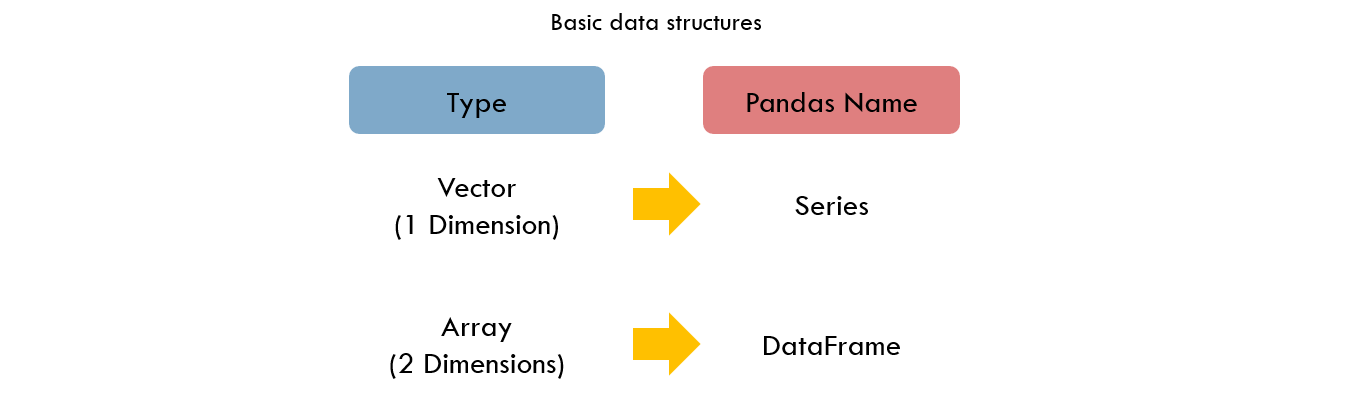

Although there are other data structures, with these two we can cover more than 90% of the use cases in AI. In fact, most of the time you will be working with DataFrames. If you are totally new to this library, you are recommended the 10 minutes to Pandas tutorial available at https://pandas.pydata.org/pandas-docs/stable/10min.html. 

***
### Matplotlib

This is the main library for producing 2D visualizations. It is one of the oldest scientific computing tools in the Python ecosystem. Although there is an increasing number of libraries for visualization for Python, Matplotlib is still widely used and actually incorporated into the pandas functionality. In addition, other more specialized visualization projects such as Seaborn are based on Matplotlib. You may refer to https://matplotlib/org/ for additional information. 

You will need to be familar with some of the basic terminology and concepts of matplotlib because frequently you will need to make modifications to the objects and plots produced by your Python code. Let's introduce some of the basics you need to know about this library so that you can get started visualizing data. Let's import the library as is customary when working in analytics: 

In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline 

This is necessary for showing the figures in the Jupyter Notebook. 

First, you have two important objects - figures subplots (also known as axes). The diagram is the top-level container for all plot elements and is the container of subplot. One diagram can have many subplots and each subplot belongs to a single diagram. The following code produces a diagram (which is not seen) with a single empty subplot. Each subplot has many elements such as a x-axis, y-axis and a title: 

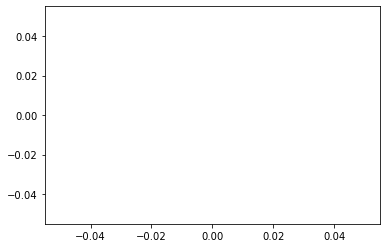

In [39]:
fig, ax = plt.subplots()
ax.plot();

A diagram with four subplots would be produced by the following code:

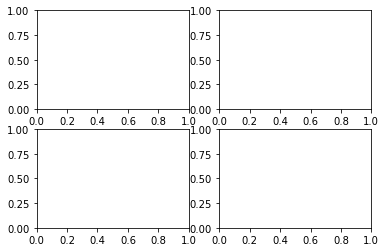

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=2)
plt.show()

One important thing to know about matplotlib is that it can be confusing for the beginner because there are two ways (interfaces) of using it - Pyplot and the Object Oriented Interface (OOI). OOI is prefered because it makes explicit the object you are working with. The formerly produced axes object is a NumPy array containing the four subplots. Let's plot some random numbers just to show you how you can refer to each of the subplots. 

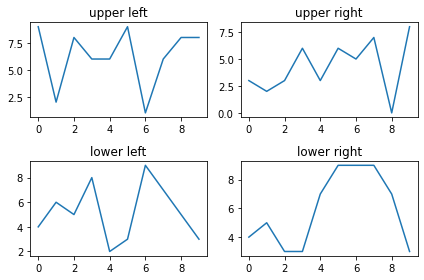

In [41]:
fig, axes = plt.subplots(ncols=2, nrows=2)
axes[0, 0].set_title('upper left') 
axes[0, 0].plot(np.arange(10), np.random.randint(0, 10, 10))

axes[0, 1].set_title('upper right') 
axes[0, 1].plot(np.arange(10), np.random.randint(0, 10, 10))

axes[1, 0].set_title('lower left') 
axes[1, 0].plot(np.arange(10), np.random.randint(0, 10, 10))

axes[1, 1].set_title('lower right') 
axes[1, 1].plot(np.arange(10), np.random.randint(0, 10, 10))

# This statement is to get a nice spacing between the subplot
fig.tight_layout(); 

Since the axes object is a NumPy array, you refer to each of the subplots using the NumPy indexation, then you use methods such as .set_title() or .plot() on each subplot to modify it as we would like. There are many of those methods and most of them are used to modify elements of a subplot. For example, the following is almost the same code as before, but written in a way that is a bit more compact and modified the y-axis's tick marks. 

The other API, pyploy, is the one you will find in most of the online examples. This is the code to produce the above plots using pyplot: 

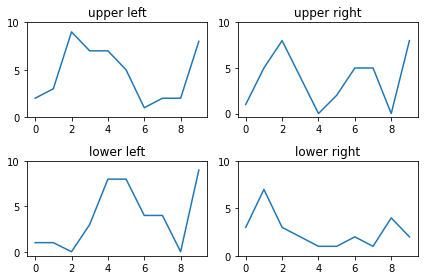

In [42]:
titles = ['upper left', 'upper right', 'lower left', 'lower right']
fig, axes = plt.subplots(ncols=2, nrows=2)
for title, ax in zip(titles, axes.flatten()): 
    ax.set_title(title)
    ax.plot(np.arange(10), np.random.randint(0, 10, 10))
    ax.set_yticks([0, 5, 10])
fig.tight_layout(); 

The following code is a minimal example of pyplot:

Text(0, 0.5, 'some numbers')

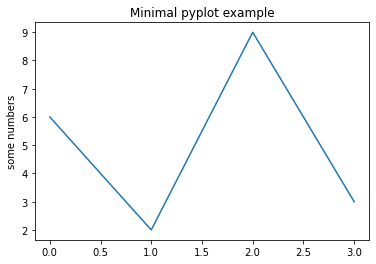

In [37]:
# Fill the ? with any numerical value between 0 to 9
plt.plot([?, ?, ?, ?])
plt.title('Minimal pyplot example')
plt.ylabel('some numbers')

***